<a href="https://colab.research.google.com/github/martda08/Tesis-GPJM/blob/main/2_4_3_Comportamiento_datos_BOLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Subsección 2.4.2-Comportamiento hemodinámico de los datos BOLD. 

*Fecha de última modificación*: 10-oct-22.

*Tesis*: Modelación de la relación entre el cerebro y el comportamiento mediante campos Gaussianos.

*Autor*: Giwon Bahg.

*Modificado por*: Daniela Martínez Aguirre

*Descripción*: Gráficas de la Subsección comportamiento hemodinámico de los datos BOLD.

*Figuras*: 3.14 a 3.16

In [ ]:
#Define las librerias a utilizar
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#Define función hemodinámica
def HRFunit(t):
        
        from scipy.special import gamma
        a1 = 6 # b1=1
        a2 = 16 # b2=1
        c = 1/6
        part1 = t**(a1-1) * np.exp(-t) / gamma(a1)
        part2 = t**(a2-1) * np.exp(-t) / gamma(a2)
        return part1 - c * part2

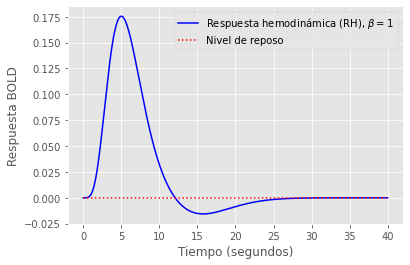

In [ ]:
#Gráfica de la respuesta hemodinámica
#Figura 2.14
import matplotlib.pyplot as plt
k=5
t=np.linspace(0, 40, 1000, dtype = np.float64)
plt.plot(t, HRFunit(t), color="blue", label=r"Respuesta hemodinámica (RH), $\beta=1$")
plt.plot(t, np.zeros(len(t)), color="red",  linestyle=":", label="Nivel de reposo")
plt.ylabel("Respuesta BOLD")
#.grid(color='b', ls = '-.', lw = 0.25)
plt.xlabel("Tiempo (segundos)")
plt.legend()
plt.show()

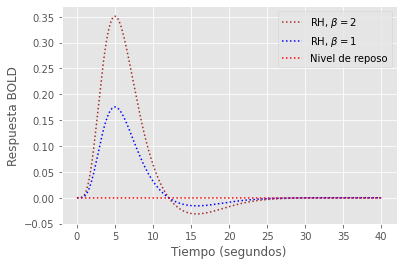

In [ ]:
#Gráfica de la respuesta hemodinámica con niveles de activacion distintos
#Figura 2.15a
import matplotlib.pyplot as plt
k=5
t=np.linspace(0, 40, 1000, dtype = np.float64)
plt.plot(t, 2*HRFunit(t), color="brown", label=r"RH, $\beta=2$", linestyle=":")
plt.plot(t, HRFunit(t), color="blue", label=r"RH, $\beta=1$", linestyle=":")
plt.plot(t, np.zeros(len(t)), color="red",  linestyle=":", label="Nivel de reposo")
plt.ylabel("Respuesta BOLD")
#.grid(color='b', ls = '-.', lw = 0.25)
plt.xlabel("Tiempo (segundos)")
plt.legend()
plt.show()

In [ ]:
#Función de convolucion de HRF
s=7
def convHRF(t,s):
  n=len(t)
  h=np.zeros(n)
  for i in range(n-1):
    if t[i]<s:
      h[i]=0

    else :
      h[i]=HRFunit(t[i]-s)
  return h

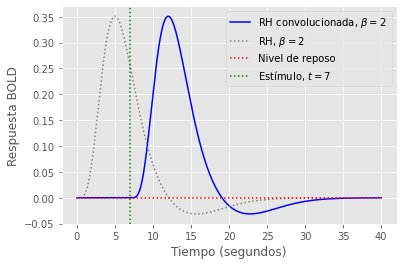

In [ ]:
#Gráfica de la convolución (desplazamiento) de la respuesta hemodinámica
#Figura 2.15b
plt.plot(t, 2*convHRF(t,s), color="blue", label=r"RH convolucionada, $\beta=2$ ")
plt.plot(t, 2*HRFunit(t), color="gray", linestyle=":", label=r"RH, $\beta=2$")
plt.plot(t, np.zeros(len(t)), color="red",  linestyle=":", label="Nivel de reposo")
plt.ylabel("Respuesta BOLD")
#.grid(color='b', ls = '-.', lw = 0.25)
plt.xlabel("Tiempo (segundos)")
plt.axvline(x = s, color = 'green', label = r'Estímulo, $t=7$', linestyle=":")
 
plt.legend()
plt.show()

In [ ]:
#Función Convolucion de HRF para la acumulación de respuestas

#tiempos de respuestas
s=np.array([1,5,7,8,10,15,20,22,24,30])
betas=np.array([3,2,3,8,1,3,2,4,4,8])

#Función
def convHRFs(t,s,betas):
  n=len(s)
  N=np.zeros(shape=(len(t),n))
  for i in range(n):
    N[:,i]=betas[i]*convHRF(t,s[i])

  return np.sum(N, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


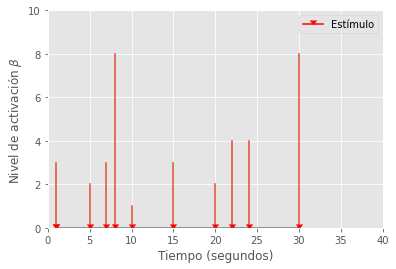

In [ ]:

#Gráfica de los niveles de activación
#Figura 2.16a
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.stem(s, betas, markerfmt=' ')
plt.ylabel(r"Nivel de activación $\beta$ ")

plt.plot(s[0], 0, marker=7, color="red", label="Estímulo")
for i in range(10):

  plt.plot(s[i], 0, marker=7, color="red")
plt.ylim(0, 10)
plt.xlim(0, 40)
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.show()

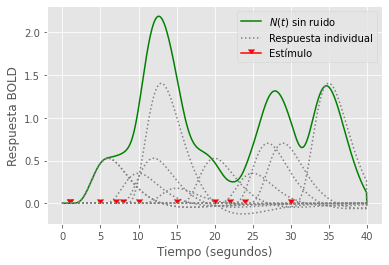

In [ ]:
#Gráfica del nivel de respuesta para distintos estímulos
#Figura 2.16b
plt.plot(t, convHRFs(t,s,betas), color="green", label=r"$N(t)$ sin ruido ")
plt.plot(t, betas[0]*convHRF(t,s[0]), color="gray", linestyle=":", label="Respuesta individual")
plt.plot(s[0], 0, marker=7, color="red", label="Estímulo")
for i in range(10):
  plt.plot(t, betas[i]*convHRF(t,s[i]), color="gray", linestyle=":")
  plt.plot(s[i], 0, marker=7, color="red")
  #plt.axvline(x=s[i], ymin=0, ymax=betas[i]/10)
#plt.plot(t, np.zeros(len(t)), color="red",  linestyle=":", label="Nivel de reposo")
plt.ylabel("Respuesta BOLD")
#.grid(color='b', ls = '-.', lw = 0.25)
plt.xlabel("Tiempo (segundos)")

#caretup
#plt.axvline(x = s, color = 'green', label = r'Estímulo, $t=7$', linestyle=":")
 
plt.legend()
plt.show()